<a href="https://colab.research.google.com/github/henrykohl/DeepLearningByPytorchTutorial/blob/master/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">04. PyTorch Custom Datasets Exercises Template</font>

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

1.13.1+cu116


'cpu'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

<font color="red">The main idea of preventing underfitting is to: increase our model's predictive power.

1. **Add more layers/units to your model (increase model complexity).** This will potentially give the model more of an opportunity to learn generalizable patterns in the training data. For example, instead of using 2 hidden layers, use 4 hidden layers instead.
2. **Use transfer learning.** Transfer leanring helps to prevent underfitting by leveraging already existing/working patterns from one model/dataset and using them with your own problem.
3. **Train the model for longer.** Perhaps your initial training schedule didn't give your model enough opportunity to learn patterns in the data. Training your model for longer (more epochs) may give improved results.</font>

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [4]:
# 1. 獲取圖檔data
import requests
import zipfile
from pathlib import Path

# 設定圖檔資料夾途徑
data_path = Path('data')
image_path = data_path / "pizza_steak_sushi"

# 若圖檔資料夾不存在, 則建立一個圖檔資料夾
if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating...")
  image_path.mkdir(parents=True, exist_ok=True)

# 從Github下載pizza, steak, sushi 資料
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

with zipfile.ZipFile(data_path /  "pizza_steak_sushi.zip", "r") as zip_ref:
  print(f"Unzipping pizza, steak, suhsi data to {image_path}")
  zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating...
Unzipping pizza, steak, suhsi data to data/pizza_steak_sushi


In [5]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
# 驗證
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [7]:
# 設定訓練資料 和 測試資料 途徑

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [8]:
# 視覺化圖檔
import random
from PIL import Image

# 設定Seed
random.seed(42)

# 1. 獲得所有檔案路徑 (* means "any combination") # 測試印3筆
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list[:3]) 

# 2. 獲得隨機選取圖檔的路徑
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. 從選取途徑獲得class name
image_class = random_image_path.parent.stem
print(image_class)

# 4. 開啟圖檔後，成為PIL.JpegImagePlugin.JpegImageFile物件
img = Image.open(random_image_path)

# 把此圖的metadata列印出來
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")



[PosixPath('data/pizza_steak_sushi/test/steak/673127.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/296375.jpg'), PosixPath('data/pizza_steak_sushi/test/steak/2117351.jpg')]
data/pizza_steak_sushi/test/pizza/195160.jpg
pizza
Random image path: data/pizza_steak_sushi/test/pizza/195160.jpg
Image class: pizza
Image height: 384
Image width: 512


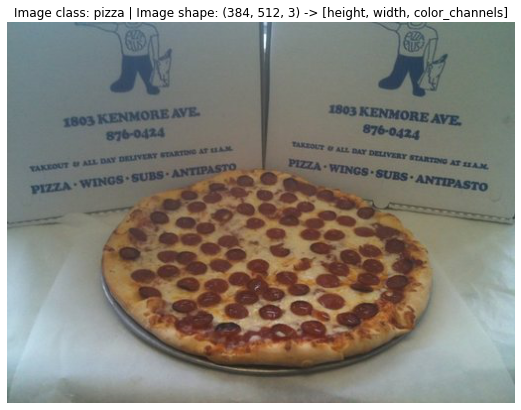

In [9]:
# 用matplotlib實踐image visualization 
import numpy as np
import matplotlib.pyplot as plt

# 圖像物件轉成矩陣
img_as_array = np.asarray(img)

# 將圖像物件畫出
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [10]:
# 3.1 使用torchvision.transforms 轉換 data 
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [11]:
# 實作transform for 轉換 images 成為 tensors
data_transform = transforms.Compose([
                    transforms.Resize(size=(64,64)),
                    transforms.RandomHorizontalFlip(p=0.5),
                    transforms.ToTensor()
])

In [12]:
random.sample(image_path_list,k=3)

[PosixPath('data/pizza_steak_sushi/test/steak/3424937.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/922752.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1225762.jpg')]

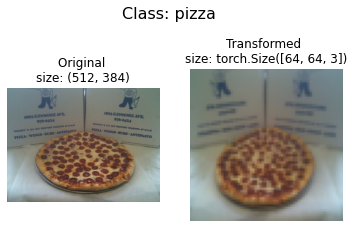

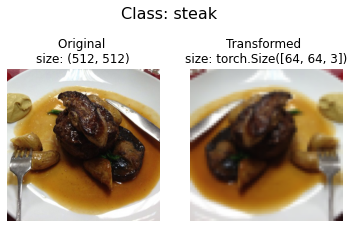

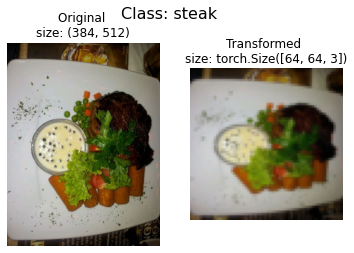

In [13]:
# 實作函數 to plot transformed images 輸入(路徑,transform, 數目, 種子)
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """Plots a series of random images from image_paths.""" 
  #設定seed
  random.seed(seed)
  #隨機選取k個圖檔的路徑
  random_image_paths = random.sample(image_paths,k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f: 
      fig, ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nsize: {f.size}") 
      ax[0].axis("off")

      # Transform and plot image
      # permute() the image to make sure it's compatible with matplotlib
      transformed_image = transform(f).permute(1,2,0)

      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nsize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
             transform=data_transform,
             n=3)

### Load image data using `ImageFolder`

In [14]:
# 使用 ImageFolder 去建立 dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root= train_dir,     # 圖檔的目標 folder  
                   transform=data_transform, # 在圖檔資料上要執行的transforms 
                   target_transform=None )  # # 在圖檔標籤上要執行的transforms
test_data = datasets.ImageFolder(root= test_dir, 
                   transform=data_transform,
                   target_transform=None )

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [18]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                  batch_size=BATCH_SIZE,
                  num_workers=os.cpu_count(),
                  shuffle=True                    
    
)
test_dataloader = DataLoader(dataset=test_data,
                batch_size=BATCH_SIZE,
                num_workers=os.cpu_count(),
                shuffle=None)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fdcacb34580>,
 <torch.utils.data.dataloader.DataLoader at 0x7fdcacb34520>)

In [19]:
# How many batches of images are in our data loaders? (注意BATCH_SIZE=1)
len(train_dataloader), len(test_dataloader)

(225, 75)

In [20]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [21]:
import torch
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self,  input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
           out_channels=hidden_units,
           kernel_size=3,
           stride=1,
           padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
           out_channels=hidden_units,
           kernel_size=3,
           stride=1,
           padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
           out_channels=hidden_units,
           kernel_size=3,
           stride=1,
           padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
           out_channels=hidden_units,
           kernel_size=3,
           stride=1,
           padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*16*16, #決定點
           out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block_1(x)
    # print(f"Layer 1 shape: {x.shape}")
    x=self.conv_block_2(x)
    # print(f"Layer 2 shape: {x.shape}")
    x=self.classifier(x)
    # print(f"Layer 3 shape: {x.shape}")
    return x

In [22]:
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [23]:
16*16*10

2560

In [24]:
# Pass dummy data through model ，用來驗證class TinyVGG中#決定點的 in_features=?
dummy_x = torch.rand(size=[1, 3, 64, 64])
model_0(dummy_x.to(device))

tensor([[-0.0227, -0.0421,  0.0560]], grad_fn=<AddmmBackward0>)

## 4. Create training and testing functions for `model_0`.

In [25]:
def train_step(model: torch.nn.Module,
        dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # dataloader 按迴圈把data batch一一取出 (Loop through data loader and data batches)
  for batch, (X,y) in enumerate(dataloader):
    # 把資料data與標籤label傳到 target device
    X, y=X.to(device), y.to(device)
    # 1. 正向傳遞 (Forward pass)
    y_pred = model(X)
    # print(y_pred)#測試
    # 2. 計算損失 (Calculate and accumulate loss)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. 優化器grad歸零 (Optimizer zero grad) 
    optimizer.zero_grad()

    # 4. 損失函數反向推算 (Loss backward) 
    loss.backward()

    # 5. 優化器單次優化 (Optimizer step)
    optimizer.step()

    # 計算損失正確率 (Calculate and accumualte accuracy metric across all batches)
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)
   

  # 調整指標，取得平均loss與平均accuracy (Adjust metrics to get average loss and average accuracy per batch)
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc 

In [26]:
def test_step(model: torch.nn.Module,
        dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # 開啟上下文推理管控 (Turn on inference context manager)
  with torch.inference_mode():
    # dataloader 按迴圈把data batch一一取出 (Loop through DataLoader batches)
    for batch, (X, y) in enumerate(dataloader):
      # 把資料data與標籤label傳到 target device
      X, y = X.to(device), y.to(device)

      # 1. 正向傳遞 (Forward pass)
      test_pred_logits = model(X)
      # print(test_pred_logits) # 測試

      # 2. 計算損失 (Calculuate and accumulate loss)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # 計算損失正確率 (Calculate and accumulate accuracy)
      test_pred_labels = torch.argmax(torch.softmax(test_pred_logits,dim=1),dim=1)
      test_acc += (test_pred_labels==y).sum().item()/len(test_pred_labels)
    
  # 調整指標，取得平均loss與平均accuracy (Adjust metrics to get average loss and accuracy per batch)
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [27]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
      train_dataloader: torch.utils.data.DataLoader,
      test_dataloader: torch.utils.data.DataLoader,
      optimizer: torch.optim.Optimizer,
      loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
      epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
         "train_acc": [],
         "test_loss": [],
         "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                        dataloader=train_dataloader,
                        loss_fn=loss_fn,
                        optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                      dataloader=test_dataloader,
                      loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
       f"train_loss: {train_loss:.4f} | "
       f"train_acc: {train_acc:.4f} | "
       f"test_loss: {test_loss:.4f} | "
       f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [28]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# (前面已建立model_0) model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), #(模型參數)TODO, 
                lr=0.001)
# 執行train函數
model_0_results = train(model=model_0,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              optimizer=optimizer,
              epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1086 | train_acc: 0.3378 | test_loss: 1.1092 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.1023 | train_acc: 0.3244 | test_loss: 1.1038 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.1006 | train_acc: 0.3422 | test_loss: 1.1024 | test_acc: 0.2533
Epoch: 4 | train_loss: 1.0992 | train_acc: 0.3333 | test_loss: 1.1016 | test_acc: 0.3600
Epoch: 5 | train_loss: 1.0991 | train_acc: 0.3067 | test_loss: 1.1021 | test_acc: 0.3333


In [29]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# 要有模型
model_1 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), #(模型參數)#TODO, 
                lr=0.001)

# 執行train函數
model_1_results = train(model=model_1,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              optimizer=optimizer,
              epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1180 | train_acc: 0.2756 | test_loss: 1.0962 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.1011 | train_acc: 0.3422 | test_loss: 1.0998 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0994 | train_acc: 0.2933 | test_loss: 1.1000 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3289 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.3067 | test_loss: 1.1005 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1010 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1012 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0984 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1014 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0997 | train_acc: 0.3422 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.1038 | train_acc: 0.4133 | test_loss: 1.1022 | test_acc: 0.3333
Epoch: 12 | train_l

In [30]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# 要有模型
model_2 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), #(模型參數)#TODO, 
                lr=0.001)

# 執行train函數
model_2_results = train(model=model_2,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              optimizer=optimizer,
              epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1180 | train_acc: 0.2756 | test_loss: 1.0962 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.1011 | train_acc: 0.3422 | test_loss: 1.0998 | test_acc: 0.2533
Epoch: 3 | train_loss: 1.0994 | train_acc: 0.2933 | test_loss: 1.1000 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.3289 | test_loss: 1.1003 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.3067 | test_loss: 1.1005 | test_acc: 0.3333
Epoch: 6 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1010 | test_acc: 0.3333
Epoch: 7 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.1012 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0984 | train_acc: 0.3467 | test_loss: 1.1018 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0989 | train_acc: 0.3467 | test_loss: 1.1014 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0997 | train_acc: 0.3422 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.1038 | train_acc: 0.4133 | test_loss: 1.1022 | test_acc: 0.3333
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [31]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# 要有模型
model_3 = TinyVGG(input_shape=3,
          hidden_units=20, # use 20 hidden units instead of 10
          output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(),
                lr=0.001) 

model_3_results = train(model=model_3,
              train_dataloader=train_dataloader,
              test_dataloader=test_dataloader,
              optimizer=optimizer,
              epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0887 | train_acc: 0.4311 | test_loss: 1.0822 | test_acc: 0.3867
Epoch: 2 | train_loss: 0.9925 | train_acc: 0.5556 | test_loss: 1.0229 | test_acc: 0.4400
Epoch: 3 | train_loss: 0.9479 | train_acc: 0.5689 | test_loss: 0.9830 | test_acc: 0.4667
Epoch: 4 | train_loss: 0.8920 | train_acc: 0.6267 | test_loss: 1.0028 | test_acc: 0.4267
Epoch: 5 | train_loss: 0.8617 | train_acc: 0.6178 | test_loss: 1.0164 | test_acc: 0.4400
Epoch: 6 | train_loss: 0.7972 | train_acc: 0.6356 | test_loss: 1.0004 | test_acc: 0.4533
Epoch: 7 | train_loss: 0.7757 | train_acc: 0.6844 | test_loss: 1.1106 | test_acc: 0.4800
Epoch: 8 | train_loss: 0.7239 | train_acc: 0.6667 | test_loss: 1.0657 | test_acc: 0.4667
Epoch: 9 | train_loss: 0.6572 | train_acc: 0.7378 | test_loss: 1.1509 | test_acc: 0.4800
Epoch: 10 | train_loss: 0.6572 | train_acc: 0.7511 | test_loss: 1.2276 | test_acc: 0.4667
Epoch: 11 | train_loss: 0.6312 | train_acc: 0.7467 | test_loss: 1.1179 | test_acc: 0.5067
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [32]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [33]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.


Excellent, we now have double the training and testing images... 

In [34]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [35]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# 使用 ImageFolder 去建立 dataset(s)
train_data_20_percent = ImageFolder(train_data_20_percent_path,       
                    transform=simple_transform,  
                    target_transform=None ) 

test_data_20_percent = ImageFolder(test_data_20_percent_path, 
                    transform=simple_transform,
                    target_transform=None )

# Create dataloaders
train_dataloader_20_percent = DataLoader(dataset=train_data_20_percent,
                       batch_size=32,
                       num_workers=os.cpu_count(),
                       shuffle=True)

test_dataloader_20_percent = DataLoader(dataset=test_data_20_percent,
                       batch_size=32,
                       num_workers=os.cpu_count(),
                       shuffle=False)

In [36]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# 要有模型
model_4 = TinyVGG(input_shape=3,
          hidden_units=20, # use 20 hidden units instead of 10
          output_shape=len(class_names)).to(device)
# 損失函數
loss_fn = nn.CrossEntropyLoss()
# 優化器
optimizer = torch.optim.Adam(model_4.parameters(),
                lr=0.001) 
# 訓練
model_4_results = train(model=model_4,
              train_dataloader=train_dataloader_20_percent,
              test_dataloader=test_dataloader_20_percent,
              optimizer=optimizer,
              epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1044 | train_acc: 0.3333 | test_loss: 1.1013 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0896 | train_acc: 0.3521 | test_loss: 1.0826 | test_acc: 0.3000
Epoch: 3 | train_loss: 1.0474 | train_acc: 0.4000 | test_loss: 1.0007 | test_acc: 0.3869
Epoch: 4 | train_loss: 0.9228 | train_acc: 0.5813 | test_loss: 0.9171 | test_acc: 0.5523
Epoch: 5 | train_loss: 0.8576 | train_acc: 0.6375 | test_loss: 0.9420 | test_acc: 0.4864
Epoch: 6 | train_loss: 0.8138 | train_acc: 0.6562 | test_loss: 0.9533 | test_acc: 0.5614
Epoch: 7 | train_loss: 0.8409 | train_acc: 0.6333 | test_loss: 0.8599 | test_acc: 0.6381
Epoch: 8 | train_loss: 0.7534 | train_acc: 0.6708 | test_loss: 0.8465 | test_acc: 0.6352
Epoch: 9 | train_loss: 0.7584 | train_acc: 0.6750 | test_loss: 0.8512 | test_acc: 0.6188
Epoch: 10 | train_loss: 0.7410 | train_acc: 0.6646 | test_loss: 0.9009 | test_acc: 0.5761
Epoch: 11 | train_loss: 0.7163 | train_acc: 0.6813 | test_loss: 0.8820 | test_acc: 0.6409
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?

In [37]:
# 第一步 Get a custom image
custom_image = "pizza_dad.jpeg"
with open(custom_image, "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg") 
  f.write(request.content)

In [46]:
# 第二步 Load the image
import torchvision
img = torchvision.io.read_image(custom_image) # custom_image 是 純文字類型，回傳一個torch.Tensor 
img                         

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

In [39]:
# type(img)

(-0.5, 3023.5, 4031.5, -0.5)

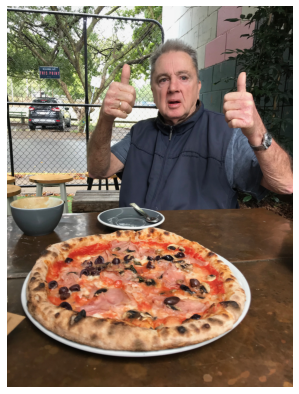

In [47]:
# 第三步 View the image
plt.figure(figsize=(10,7))

# img = img.type(torch.float32) / 255 # 也可以
plt.imshow(img.permute(1,2,0))
plt.axis(False)

(-0.5, 63.5, 63.5, -0.5)

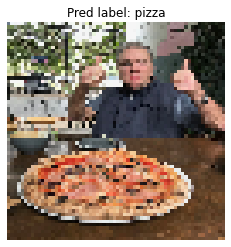

In [48]:
# 第四步 Make a prediction on the image
model_4.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255

  # Resize image to 64x64
  resize = transforms.Resize((64, 64))
  img = resize(img)

  # Turn image in single batch and pass to target device
  batch = img.unsqueeze(0).to(device)

  # Predict on image
  y_pred_logit = model_4(batch)

  # Convert pred logit to pred label
  # pred_label = torch.argmax(torch.softmax(y_pred_logit,dim=1),dim=1)
  pred_label = torch.argmax(y_pred_logit,dim=1)            # 不用torch.softmax也可以

# Plot the image and prediction
plt.imshow(img.permute(1,2,0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False)